In [11]:
import numpy as np

# Specify the delimiter if the values are comma-separated
matrix = np.loadtxt('matrix.txt', delimiter=',')

print(matrix[:,3:])
list_br = np.array([matrix[23,3],matrix[14,3],matrix[17,7],matrix[16,7],matrix[15,7]])
print(list_br)

[[ 0.          0.17188984 -0.18345253  0.15984719 -0.11359034]
 [ 0.22957526 -0.08191025 -0.02963034  0.11208441 -0.17086754]
 [ 0.17680585 -0.18429807  0.15663765 -0.10834737  0.        ]
 [ 0.          0.          0.33658701 -0.35398274  0.25243083]
 [ 0.          0.38846936 -0.09176005 -0.18876366  0.32712091]
 [ 0.29688171  0.21190553 -0.28321592  0.08604456  0.28439428]
 [ 0.38780357 -0.0867439  -0.19183164  0.32640146  0.        ]
 [ 0.34055693 -0.3521997   0.24827076  0.          0.        ]
 [ 0.          0.          0.          0.85830815 -0.03019782]
 [ 0.          0.          0.69804138  0.51674256 -0.12785688]
 [ 0.          0.46278267  0.71198651  0.21478076 -0.14867857]
 [ 0.23273949  0.66977363  0.53641074 -0.01012641 -0.10950798]
 [ 0.45578747  0.72462249  0.25768407 -0.11890291  0.        ]
 [ 0.69050307  0.58789342 -0.03225351  0.          0.        ]
 [ 0.89387982  0.19343421  0.          0.          0.        ]
 [ 0.          0.          0.          0.          1.  

In [13]:
list_br = np.array([matrix[23,3],matrix[14,3],matrix[17,7],matrix[16,7],matrix[15,7]])
print(list_br)

[1.         0.89387982 0.72106262 0.89391727 1.        ]


In [141]:
def g(theta_k,phase_val,kai_val):
    theta_k = theta_k * np.pi/180
    phase_val = phase_val * np.pi/180
    kai_val = kai_val * np.pi/180
    g = np.zeros((5), dtype=complex)

    C_0 = (np.sqrt(3/2))*(1/3) * np.array([[-1,  0, 0],
                                           [ 0, -1, 0],
                                           [ 0,  0, 2]], dtype=complex)
    
    C_p1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,  -1],
                                                    [ 0,   0,  1j],
                                                    [-1,  1j,   0]], dtype=complex)
    
    C_n1 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 0,   0,   1],
                                                    [ 0,   0,  1j],
                                                    [ 1,  1j,   0]], dtype=complex)
    
    C_p2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   -1j, 0],
                                                    [-1j,  -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C_n2 = (np.sqrt(3/2))*(1/np.sqrt(6)) * np.array([[ 1,   1j,  0],
                                                    [1j,   -1,  0],
                                                    [ 0,    0,  0]], dtype=complex)
    
    C = [C_n2, C_n1, C_0, C_p1, C_p2]
    
    e_ll = np.array([np.cos(theta_k),
                      0,
                     -np.sin(theta_k)], dtype=complex)
    
    e_T = np.array([0,
                    1,
                    0], dtype=complex)
    
    k_vec = np.array([np.sin(theta_k), 0, np.cos(theta_k)], dtype=complex)
    
    for q in range(5):
        temp_g = 0+0j
        for i in range(3):
            for j in range(3):
                temp_g += C[q][i, j] * (
                    e_ll[i]*np.cos(kai_val) +
                    e_T[i]*np.sin(kai_val)*np.exp(1j*phase_val)
                ) * k_vec[j]
        g[q] = np.abs(temp_g)
    return g


In [143]:
def calc_piTimes(Q,tk_val,phase,kai):
    return Q / np.abs(g(tk_val,phase,kai)*list_br)

pi_times_target = np.array([21.885, 40.4065, 47.84644, 33.788, 43.9078])
rabi_freqs_target = (np.pi /pi_times_target)

In [145]:

print(rabi_freqs_target)
print(rabi_freqs_target/ rabi_freqs_target[2])
calculated_rabi_freqs  = np.abs(g( 45,  35,         120) * list_br)
calc_rabi_ratios =  calculated_rabi_freqs / calculated_rabi_freqs[2]
print(calc_rabi_ratios)

[0.14355004 0.07774969 0.0656599  0.09297954 0.07154976]
[2.18626639 1.18412731 1.         1.4160779  1.08970251]
[1.77330955 1.23967018 1.         1.23972212 1.15894162]


In [147]:
import numpy as np
from scipy.optimize import minimize

def calc_piTimes(params, rabi_ratios, list_br):
    tk_val,  phase, kai = params
    calculated_rabi_freqs  = np.abs(g(tk_val, phase, kai) * list_br)[:-1]
    calc_rabi_ratios =  calculated_rabi_freqs / calculated_rabi_freqs[2]
    # print(params, calc_rabi_ratios)
    res = np.linalg.norm(calc_rabi_ratios - rabi_ratios)
    # print('res = ', res)
    return res
    

rabi_ratios = calc_rabi_ratios[:-1]#np.array(rabi_freqs_target / rabi_freqs_target[2])[:-1]


# Initial guess for the parameters [Q, tk_val, tp_val, phase, kai]
initial_guess = [30, 30, 30]
options = {'maxiter': 10000}  # Set maxiter to your desired value

# Perform the minimization
result = minimize(calc_piTimes, initial_guess, args=(rabi_ratios, list_br), 
                  options=options, method='L-BFGS-B')

# Display the optimized parameters
if result.success:
    optimized_params = result.x
    [tk_val, phase, kai] = optimized_params
    print("Optimized Parameters:")
    # print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[0]}")
    print(f"phase: {optimized_params[1]}")
    print(f"kai: {optimized_params[2]}")
else:
    print("Optimization did not converge.")
calculated_pi_times =np.abs(g(tk_val, phase, kai) * list_br) / np.abs(g(tk_val, phase, kai) * list_br)[2]
print(calculated_pi_times)
rabi_freqs_target = (np.pi /pi_times_target)
print(rabi_ratios)

Optimized Parameters:
tk_val: 45.00000002543675
phase: -35.000000096385975
kai: 59.999999991122905
[1.77330955 1.23967018 1.         1.23972212 1.15894162]
[1.77330955 1.23967018 1.         1.23972212]


In [190]:
import numpy as np
from scipy.optimize import minimize

def calc_piTimes(params, rabi_ratios, list_br):
    tk_val, phase, kai = params
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai) * list_br)
    calc_rabi_ratios = (calculated_rabi_freqs / calculated_rabi_freqs[2])[[0,1,2,3]]
    res = np.linalg.norm(calc_rabi_ratios - rabi_ratios)
    return res

rabi_ratios = np.array(rabi_freqs_target / rabi_freqs_target[2])[[0,1,2,3]]
print(rabi_ratios)
# Initial guess for the parameters [tk_val, phase, kai]
initial_guess = [30, 30, 30]
options = {'maxiter': 10000}

# Define bounds for the parameters
tk_bounds = (0, 90)            # Example bounds for tk_val
phase_bounds = (-90, 90) # Example bounds for phase
kai_bounds = (-90, 90)            # Example bounds for kai
bounds = [tk_bounds, phase_bounds, kai_bounds]

# Perform the minimization with bounds
result = minimize(
    calc_piTimes,
    initial_guess,
    args=(rabi_ratios, list_br),
    method='L-BFGS-B',
    bounds=bounds,
    options=options
)

# Display the optimized parameters
if result.success:
    optimized_params = result.x
    tk_val, phase, kai = optimized_params
    print("Optimized Parameters:")
    print(f"tk_val: {tk_val}")
    print(f"phase: {phase}")
    print(f"kai: {kai}")
else:
    print("Optimization did not converge.")

calculated_pi_times = np.abs(g(tk_val, phase, kai) * list_br) / np.abs(g(tk_val, phase, kai) * list_br)[2]
print(calculated_pi_times)
rabi_freqs_target = (np.pi / pi_times_target)
print(rabi_ratios)


[2.18626639 1.18412731 1.         1.4160779 ]
Optimized Parameters:
tk_val: 48.41551903088596
phase: -73.05647332742484
kai: 62.49680417297251
[2.18626639 1.18412731 1.         1.4160779  1.10917321]
[2.18626639 1.18412731 1.         1.4160779 ]


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_38036\23950815.py:7: RuntimeWarning: divide by zero encountered in divide
  calc_rabi_ratios = (calculated_rabi_freqs / calculated_rabi_freqs[2])[[0,1,2,3]]
C:\Users\Gaurav\AppData\Local\Temp\ipykernel_38036\23950815.py:7: RuntimeWarning: invalid value encountered in divide
  calc_rabi_ratios = (calculated_rabi_freqs / calculated_rabi_freqs[2])[[0,1,2,3]]


In [86]:
import numpy as np
from scipy.optimize import minimize
import itertools

# Assuming g, rabi_freqs_target, list_br, and pi_times_target are defined elsewhere

def calc_piTimes(params, rabi_ratios, list_br, excluded_indices= None):
    tk_val, phase, kai = params
    
    # Exclude indices specified in excluded_indices
    mask = np.ones(len(list_br), dtype=bool)
    # print(mask)
    if excluded_indices:
        mask[np.array(excluded_indices)] = False
    # print(mask)
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai) * list_br)[mask]
    # print(calculated_rabi_freqs)
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios[mask])

# Define rabi_ratios (excluding the last two indices as before)
rabi_ratios = np.array(rabi_freqs_target / rabi_freqs_target[2])

# Generate all 5 choose 2 combinations to exclude
exclude_combinations = list(itertools.combinations(range(5), 1))

# Initial guess for the parameters
initial_guess = [47.77777737, 90, 117.83508925]
options = {'maxiter': 10000}  # Set maxiter to your desired value

results = []

initial_guess = [47.77777737, -90, 59]
perturbation = np.random.uniform(-0.1, 0.1, size=len(initial_guess))  # Small random perturbation
perturbed_guess = np.array(initial_guess) + perturbation


# Iterate through all combinations of indices to exclude
for excluded_indices in exclude_combinations:
    # Perform the minimization
    perturbation = np.random.uniform(-3, 3, size=len(initial_guess))  # Small random perturbation
    perturbed_guess = np.array(initial_guess) + perturbation
    print('initial_guess = ',perturbed_guess)
    result = minimize(
        calc_piTimes, 
        perturbed_guess, 
        args=(rabi_ratios, list_br, excluded_indices), 
        options=options, 
        method='L-BFGS-B'
    )

    if result.success:
        optimized_params = result.x
        tk_val, phase, kai = optimized_params

        calculated_pi_times = np.abs(g(tk_val, phase, kai) * list_br) / np.abs(g(tk_val, phase, kai) * list_br)[2]
        
        results.append({
            'excluded_indices': excluded_indices,
            'optimized_params': optimized_params,
            'calculated_pi_times': calculated_pi_times,
            'success': result.success,
            'fun': result.fun
        })
        print(f"Excluded Indices: {excluded_indices}")
        print(f"Optimized Parameters: tk_val={tk_val}, phase={phase}, kai={kai}")
        print(f"Objective Function Value: {result.fun}")
        print()
    else:
        print(f"Optimization failed for excluded indices {excluded_indices}")
    if excluded_indices == exclude_combinations[-1]:
        perturbation = np.random.uniform(-3, 3, size=len(initial_guess))  # Small random perturbation
        perturbed_guess = np.array(initial_guess) + perturbation
        print('initial_guess = ',perturbed_guess)
        result = minimize(
            calc_piTimes, 
            perturbed_guess, 
            args=(rabi_ratios, list_br), 
            options=options, 
            method='L-BFGS-B'
        )
    
        if result.success:
            optimized_params = result.x
            tk_val, phase, kai = optimized_params
    
            calculated_pi_times = np.abs(g(tk_val, phase, kai) * list_br) / np.abs(g(tk_val, phase, kai) * list_br)[2]
            
            results.append({
                'excluded_indices': None,
                'optimized_params': optimized_params,
                'calculated_pi_times': calculated_pi_times,
                'success': result.success,
                'fun': result.fun
            })
            print(f"Excluded Indices: {excluded_indices}")
            print(f"Optimized Parameters: tk_val={tk_val}, phase={phase}, kai={kai}")
            print(f"Objective Function Value: {result.fun}")
            print()
        else:
            print(f"Optimization failed for excluded indices {excluded_indices}")
# Optionally, display all results
print("\nSummary of Results:")
for res in results:
    print(f"Excluded Indices: {res['excluded_indices']}")
    print(f"Optimized Parameters: {res['optimized_params']}")
    print(f"Objective Function Value: {res['fun']}")
    print()


initial_guess =  [ 49.70704208 -92.63171124  61.96232695]
Excluded Indices: (0,)
Optimized Parameters: tk_val=40.7972617001837, phase=-165.4116489476116, kai=52.3696972590479
Objective Function Value: 0.43688374705606925

initial_guess =  [ 48.67814906 -91.46792005  59.39700991]
Excluded Indices: (1,)
Optimized Parameters: tk_val=51.621921218693295, phase=-147.77376295580348, kai=49.48184788929093
Objective Function Value: 0.730553805531239

initial_guess =  [ 46.20396535 -87.28097336  61.54263242]
Excluded Indices: (2,)
Optimized Parameters: tk_val=43.122776576811525, phase=-37.40427863814971, kai=32.547848499882306
Objective Function Value: 0.41607789747936175

initial_guess =  [ 46.14318285 -91.1420476   56.4466857 ]
Excluded Indices: (3,)
Optimized Parameters: tk_val=48.32515352373549, phase=-103.58704685908, kai=62.44446825897722
Objective Function Value: 2.0998011805546838e-09

initial_guess =  [ 50.44378909 -89.52246687  61.02666694]
Excluded Indices: (4,)
Optimized Parameters: 

In [110]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def calc_piTimes(params, rabi_ratios, list_br, excluded_indices):
    tk_val, phase, kai = params
    
    # Exclude indices specified in excluded_indices
    mask = np.ones(len(list_br), dtype=bool)
    # print(mask)
    mask[np.array(excluded_indices)] = False
    # print(mask)
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai) * list_br)[mask]
    # print(calculated_rabi_freqs)
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios[mask])

# Define parameter ranges
initial_guess = [47.77777737, -90, 59]

range_tk = np.linspace(initial_guess[0]-5,initial_guess[0]+ 5, 30)  # +-20 range, adjust granularity as needed
range_phase = np.linspace(initial_guess[1]-5,initial_guess[1]+ 5, 30)
range_kai = np.linspace(initial_guess[2]-5,initial_guess[2]+ 5, 30)

# Create a grid of parameters
tk_vals, phase_vals, kai_vals = np.meshgrid(range_tk, range_phase, range_kai)

# Flatten the grid for easier computation
tk_vals_flat = tk_vals.flatten()
phase_vals_flat = phase_vals.flatten()
kai_vals_flat = kai_vals.flatten()

# Storage for objective values
objective_values = []

for tk_val, phase, kai in zip(tk_vals_flat, phase_vals_flat, kai_vals_flat):
    params = [tk_val, phase, kai]
    obj_val = calc_piTimes(params, rabi_ratios, list_br, excluded_indices = ex_index)  # No excluded indices for visualization
    objective_values.append(obj_val)

objective_values = np.array(objective_values)

# # Plotting
# fig = plt.figure(figsize=(10, 7))
# ax = fig.add_subplot(111, projection='3d')

# # Normalize the color map to the range of objective values
# norm = plt.Normalize(objective_values.min(), objective_values.max())

# # Scatter plot with color encoding for the objective value
# sc = ax.scatter(
#     tk_vals_flat, 
#     phase_vals_flat, 
#     kai_vals_flat, 
#     c=objective_values, 
#     cmap='viridis', 
#     marker='o', 
#     alpha=0.3
# )

# # Add a color bar to indicate the objective value scale
# cbar = plt.colorbar(sc, ax=ax, pad=0.1)
# cbar.set_label('Objective Value')

# # Set axis labels
# ax.set_xlabel('tk_val')
# ax.set_ylabel('phase')
# ax.set_zlabel('kai')

# # Set plot title
# ax.set_title('4D Plot: Parameters and Objective Value')

# # Show the plot
# plt.show()


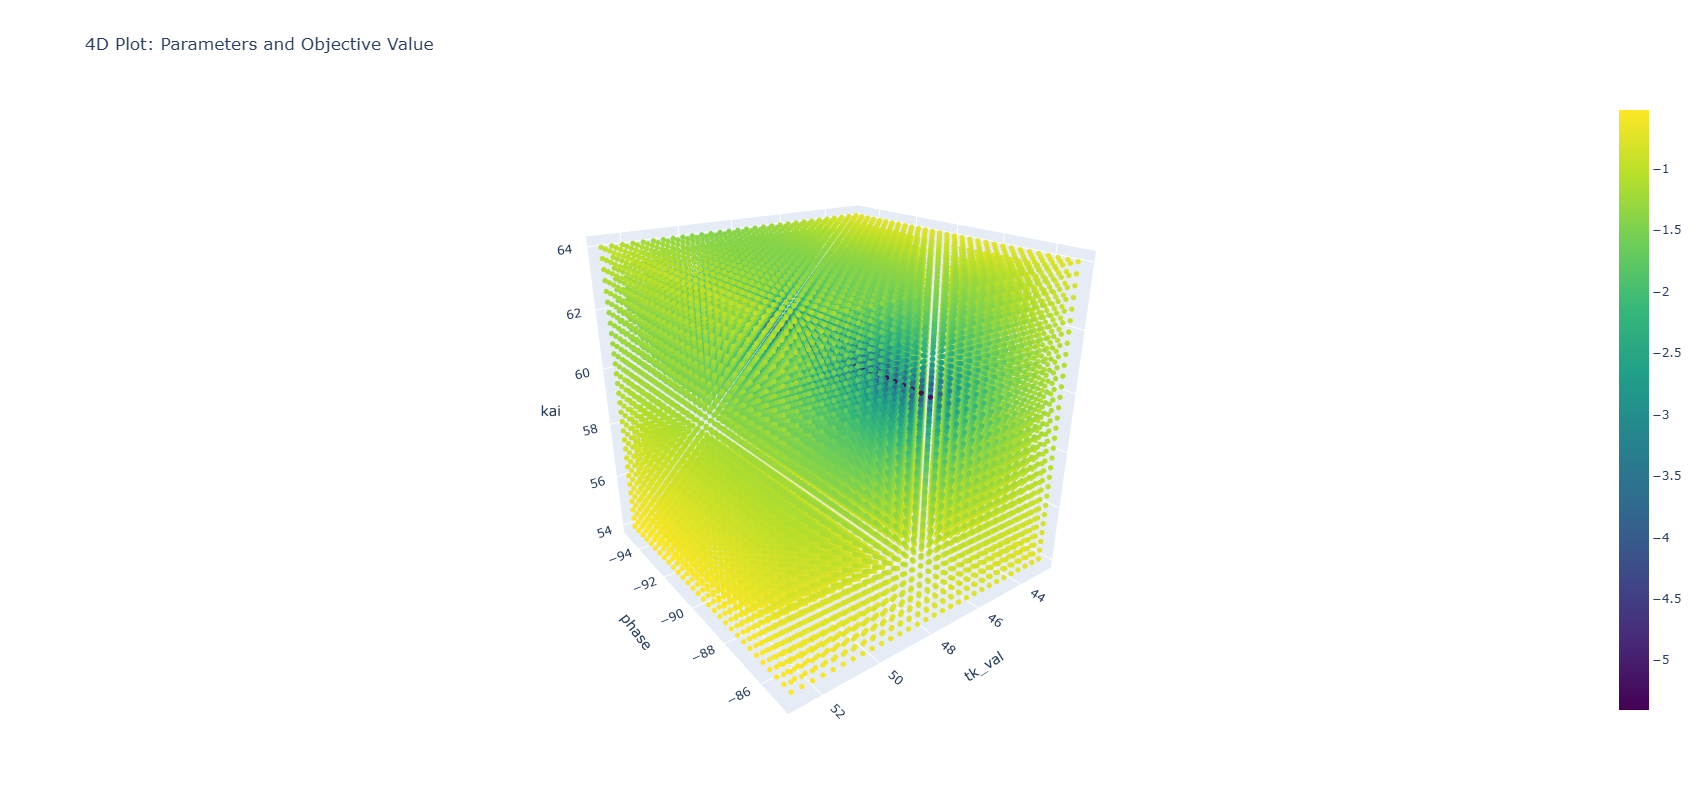

In [111]:
import plotly.graph_objects as go

# Create a scatter plot
fig = go.Figure(data=go.Scatter3d(
    x=tk_vals_flat,
    y=phase_vals_flat,
    z=kai_vals_flat,
    mode='markers',
    marker=dict(
        size=3,
        color=np.log(objective_values),  # Objective values determine color
        colorscale='Viridis',    # Colorscale
        showscale=True           # Add a color bar
    )
))

# Set axis labels
fig.update_layout(
    scene=dict(
        xaxis_title='tk_val',
        yaxis_title='phase',
        zaxis_title='kai'
    ),
    title='4D Plot: Parameters and Objective Value',
    width=1200,  # Adjust the width of the plot
    height=800   # Adjust the height of the plot
)

# Show the plot
fig.show()


In [96]:
%matplotlib widget

In [13]:
np.array([2.29809569, 1.33634598, 1.09002893])*180/np.pi

array([131.67118395,  76.56698462,  62.45405724])

In [23]:
import numpy as np
from scipy.optimize import minimize
import itertools

pi_times_target = np.array([19.121851107233326,36.167107792701685,40.54474274596791,30.27197863805065,39.92927034220342])
rabi_freqs_target =np.pi /pi_times_target
print(rabi_freqs_target)
rabi_ratios = rabi_freqs_target / rabi_freqs_target[2]

# Function to calculate piTimes error
def calc_piTimes(params, rabi_ratios_train, list_br, training_list):
    tk_val, phase, kai = params
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai)[list(train_indices)] * list_br[training_list])
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios_train)

initial_guesses = []

for i  in np.linspace(0,90,10):
    for j in np.linspace(0,90,2):
        for k in np.linspace(0,90,2):
            initial_guesses.append([i,j,k])


initial_guesses = [[47.77777737,  90,         117.83508925]] 

# Track results for comparison
results = []

# Loop to select random combinations of training and testing data
for initial_guess in initial_guesses:
    for train_indices in itertools.combinations(range(5), 3):
        test_indices = list(set(range(5)) - set(train_indices))
        
        # Create training and testing sets
        
        rabi_ratios_train = rabi_freqs_target[list(train_indices)]/ rabi_freqs_target[list(train_indices)][2]
        list_br_train = list_br[list(train_indices)]
        
        rabi_ratios_test = rabi_freqs_target[list(test_indices)]/ rabi_freqs_target[list(train_indices)][2]
        list_br_test = list_br[list(test_indices)]
        print(rabi_freqs_target[list(train_indices)], rabi_freqs_target[list(train_indices)][2], rabi_ratios_train, rabi_ratios_test)
        # Perform optimization
        result = minimize(calc_piTimes, initial_guess, args=(rabi_ratios_train, list_br, list(train_indices)))
        
        if result.success:
            optimized_params = result.x
            tk_val, phase, kai = optimized_params
            
            # Calculate predictions for testing data points
            calculated_pi_times_test = np.abs(g(tk_val, phase, kai)[list(test_indices)] * list_br_test) / np.abs(g(tk_val, phase, kai)[list(train_indices)] * list_br_train)[2]
            
            # Calculate error on the test set
            test_error = np.linalg.norm(calculated_pi_times_test - rabi_ratios_test)
            print('calc: ',calculated_pi_times_test)
            print('test: ',rabi_ratios_test)
            # Store result
            results.append({
                'initial_guess': initial_guess,
                'train_indices': train_indices,
                'test_indices': test_indices,
                'optimized_params': optimized_params,
                'test_error': test_error
            })
        else:
            print('Failed')

# Find the best result based on the lowest test error
best_result = min(results, key=lambda x: x['test_error'])
print("Best Result:")
print(f"Initial Guess: {best_result['initial_guess']}")
print(f"Training Indices: {best_result['train_indices']}")
print(f"Testing Indices: {best_result['test_indices']}")
print(f"Optimized Parameters: {best_result['optimized_params']}")
print(f"Test Error: {best_result['test_error']}")

a,b,c = best_result['optimized_params']

rabi_freqs_target = (np.pi /pi_times_target)
print(rabi_freqs_target/ rabi_freqs_target[2])
calculated_rabi_freqs  = np.abs(g(a,b,c) * list_br)
calc_rabi_ratios =  calculated_rabi_freqs / calculated_rabi_freqs[2]
print(calc_rabi_ratios)

# Optionally, print all results for comparison
for res in results:
    print(res)


[0.16429333 0.08686325 0.07748459 0.1037789  0.07867894]
[0.16429333 0.08686325 0.07748459] 0.07748458717011389 [2.12033566 1.12103912 1.        ] [1.33934895 1.01541407]
Failed
[0.16429333 0.08686325 0.1037789 ] 0.1037789003207388 [1.58310921 0.83700303 1.        ] [0.74663141 0.75814004]
Failed
[0.16429333 0.08686325 0.07867894] 0.07867893970176743 [2.08814879 1.10402166 1.        ] [0.98481992 1.31901753]
Failed
[0.16429333 0.07748459 0.1037789 ] 0.1037789003207388 [1.58310921 0.74663141 1.        ] [0.83700303 0.75814004]
Failed
[0.16429333 0.07748459 0.07867894] 0.07867893970176743 [2.08814879 0.98481992 1.        ] [1.10402166 1.31901753]
calc:  [1.16164181 1.35297644]
test:  [1.10402166 1.31901753]
[0.16429333 0.1037789  0.07867894] 0.07867893970176743 [2.08814879 1.31901753 1.        ] [1.10402166 0.98481992]
Failed
[0.08686325 0.07748459 0.1037789 ] 0.1037789003207388 [0.83700303 0.74663141 1.        ] [1.58310921 0.75814004]
Failed
[0.08686325 0.07748459 0.07867894] 0.0786789

In [25]:
import numpy as np
from scipy.optimize import basinhopping
import itertools

# Assuming these are defined elsewhere:
# pi_times_target = ...
# list_br = ...
# def g(tk_val, phase, kai): ...
# etc.

pi_times_target = np.array([19.121851107233326,36.167107792701685,40.54474274596791,30.27197863805065,39.92927034220342])
rabi_freqs_target = np.pi / pi_times_target
rabi_ratios = rabi_freqs_target / rabi_freqs_target[2]

def calc_piTimes(params, rabi_ratios_train, list_br, training_list):
    tk_val, phase, kai = params
    # Compute the rabi frequencies for the training indices
    g_vals = g(tk_val, phase, kai)
    calculated_rabi_freqs = np.abs(g_vals[list(training_list)] * list_br[training_list])
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios_train)

# Reduce the number of initial guesses:
np.random.seed(0)  # for reproducibility
initial_guesses = [[47.77777737,  90,         117.83508925]]

results = []

# Consider using fewer splits to reduce runtime:
# For a problem of size 5, choose only a few combinations:
all_combinations = list(itertools.combinations(range(5), 3))
np.random.shuffle(all_combinations)
selected_combinations = all_combinations[:5]  # Only take 5 random combinations for example

for initial_guess in initial_guesses:
    for train_indices in selected_combinations:
        test_indices = list(set(range(5)) - set(train_indices))

        rabi_ratios_train = rabi_freqs_target[list(train_indices)] / rabi_freqs_target[list(train_indices)][2]
        list_br_train = list_br[list(train_indices)]
        
        rabi_ratios_test = rabi_freqs_target[list(test_indices)] / rabi_freqs_target[list(train_indices)][2]
        list_br_test = list_br[list(test_indices)]
        
        # Setup basinhopping
        minimizer_kwargs = {"args": (rabi_ratios_train, list_br, list(train_indices))}
        
        result = basinhopping(calc_piTimes, initial_guess, minimizer_kwargs=minimizer_kwargs, niter=100)
        
        if result.lowest_optimization_result.success:
            optimized_params = result.x
            tk_val, phase, kai = optimized_params

            # Compute test error
            g_vals = g(tk_val, phase, kai)
            calculated_rabi_freqs_train = np.abs(g_vals[list(train_indices)] * list_br_train)
            calculated_rabi_freqs_test = np.abs(g_vals[list(test_indices)] * list_br_test)
            
            # Normalize ratios by training set's third element as done before
            calculated_ratios_test = calculated_rabi_freqs_test / calculated_rabi_freqs_train[2]
            test_error = np.linalg.norm(calculated_ratios_test - rabi_ratios_test)

            results.append({
                'initial_guess': initial_guess,
                'train_indices': train_indices,
                'test_indices': test_indices,
                'optimized_params': optimized_params,
                'test_error': test_error
            })
        else:
            print('Optimization failed for initial guess:', initial_guess, 'and train_indices:', train_indices)

if results:
    best_result = min(results, key=lambda x: x['test_error'])
    print("Best Result:")
    print(f"Initial Guess: {best_result['initial_guess']}")
    print(f"Training Indices: {best_result['train_indices']}")
    print(f"Testing Indices: {best_result['test_indices']}")
    print(f"Optimized Parameters: {best_result['optimized_params']}")
    print(f"Test Error: {best_result['test_error']}")

    a,b,c = best_result['optimized_params']
    print("Rabi Frequency Target Ratios:")
    print(rabi_freqs_target / rabi_freqs_target[2])
    
    calc_rabi_freqs = np.abs(g(a,b,c) * list_br)
    calc_rabi_ratios = calc_rabi_freqs / calc_rabi_freqs[2]
    print("Calculated Rabi Ratios:")
    print(calc_rabi_ratios)

    # Optionally print all results for comparison
    for res in results:
        print(res)
else:
    print("No successful optimization results found.")


Optimization failed for initial guess: [47.77777737, 90, 117.83508925] and train_indices: (0, 1, 4)
Optimization failed for initial guess: [47.77777737, 90, 117.83508925] and train_indices: (1, 3, 4)
Optimization failed for initial guess: [47.77777737, 90, 117.83508925] and train_indices: (0, 1, 3)
Best Result:
Initial Guess: [47.77777737, 90, 117.83508925]
Training Indices: (0, 2, 4)
Testing Indices: [1, 3]
Optimized Parameters: [ 47.96542516  89.96394252 117.92084654]
Test Error: 0.053620630180965904
Rabi Frequency Target Ratios:
[2.12033566 1.12103912 1.         1.33934895 1.01541407]
Calculated Rabi Ratios:
[2.16177574 1.18063255 1.         1.39099108 1.02942415]
{'initial_guess': [47.77777737, 90, 117.83508925], 'train_indices': (0, 2, 4), 'test_indices': [1, 3], 'optimized_params': array([ 47.96542516,  89.96394252, 117.92084654]), 'test_error': 0.053620630180965904}
{'initial_guess': [47.77777737, 90, 117.83508925], 'train_indices': (2, 3, 4), 'test_indices': [0, 1], 'optimized_

In [598]:
import numpy as np
from scipy.optimize import minimize
import itertools

pi_times_target = np.array([19.121851107233326, 36.167107792701685, 40.54474274596791, 30.27197863805065, 39.92927034220342])
rabi_freqs_target = np.pi / pi_times_target
print(rabi_freqs_target)
rabi_ratios = rabi_freqs_target / rabi_freqs_target[2]

# Function to calculate piTimes error
def calc_piTimes(params, rabi_ratios_train, list_br, training_list):
    tk_val, phase, kai = params
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai)[list(training_list)] * list_br[training_list])
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    # print(calc_rabi_ratios)
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios_train)

initial_guesses = []
for i in np.linspace(40, 50, 10):
    for j in np.linspace(-90, 90, 10):
        for k in np.linspace(-90, 90, 10):
            initial_guesses.append([i, j, k])

# Track results for comparison
results = []

# Loop over each initial guess
for initial_guess in initial_guesses:
    combined_test_error = 0  # Initialize combined test error for each initial guess
    optimized_params_sum = np.zeros(3)  # Sum of optimized parameters for averaging
    successful_combinations = 0  # Track successful optimization runs

    # Loop to select combinations of training and testing data
    for train_indices in itertools.combinations(range(5), 4):
        test_indices = list(set(range(5)) - set(train_indices))

        # Create training and testing sets
        rabi_ratios_train = rabi_freqs_target[list(train_indices)] / rabi_freqs_target[list(train_indices)][2]
        list_br_train = list_br[list(train_indices)]
        
        rabi_ratios_test = rabi_freqs_target[list(test_indices)] / rabi_freqs_target[list(train_indices)][2]
        list_br_test = list_br[list(test_indices)]
        
        # print(rabi_ratios_train)
        result = minimize(calc_piTimes, initial_guess, args=(rabi_ratios_train, list_br, list(train_indices)))
        
        if result.success:
            optimized_params = result.x
            tk_val, phase, kai = optimized_params
            
            # Calculate predictions for testing data points
            calculated_pi_times_test = np.abs(g(tk_val, phase, kai)[list(test_indices)] * list_br_test) / np.abs(g(tk_val, phase, kai)[list(train_indices)] * list_br_train)[2]
            
            # Calculate error on the test set
            test_error = np.linalg.norm(calculated_pi_times_test - rabi_ratios_test)
            
            # Add the test error to the combined test error for this initial guess
            combined_test_error += test_error
            
            # Sum optimized parameters to later calculate their average
            optimized_params_sum += optimized_params
            successful_combinations += 1
        # else:
            # print('Failed optimization for initial guess:', initial_guess, 'and train indices:', train_indices)

    # Average the optimized parameters and calculate the average test error
    if successful_combinations > 0:
        avg_optimized_params = optimized_params_sum / successful_combinations
        avg_test_error = combined_test_error / successful_combinations
        results.append({
            'initial_guess': initial_guess,
            'avg_optimized_params': avg_optimized_params,
            'combined_test_error': avg_test_error
        })

# Find the initial guess with the lowest combined test error
best_result = min(results, key=lambda x: x['combined_test_error'])
print("Best Result:")
print(f"Initial Guess: {best_result['initial_guess']}")
print(f"Average Optimized Parameters: {best_result['avg_optimized_params']}")
print(f"Combined Test Error: {best_result['combined_test_error']}")

# Optionally, print all results for comparison
for res in results:
    print(res)


[0.16429333 0.08686325 0.07748459 0.1037789  0.07867894]
Best Result:
Initial Guess: [42.22222222222222, 10.0, 90.0]
Average Optimized Parameters: [41.98188031  9.69302221 90.2022994 ]
Combined Test Error: 0.30810764808098234
{'initial_guess': [40.0, -90.0, -90.0], 'avg_optimized_params': array([ 39.87560536, -90.49838918, -89.22690444]), 'combined_test_error': 0.4857493914141019}
{'initial_guess': [40.0, -90.0, -70.0], 'avg_optimized_params': array([ 40.03746365, -90.64078555, -70.792248  ]), 'combined_test_error': 0.5628024006316978}
{'initial_guess': [40.0, -90.0, -50.0], 'avg_optimized_params': array([ 38.64982109, -90.56715143, -49.30652173]), 'combined_test_error': 0.5108277150306653}
{'initial_guess': [40.0, -90.0, -30.0], 'avg_optimized_params': array([ 39.97925922, -90.10337056, -30.16467997]), 'combined_test_error': 0.5171647798680553}
{'initial_guess': [40.0, -90.0, -10.0], 'avg_optimized_params': array([ 39.12906326, -90.42254585, -10.02249913]), 'combined_test_error': 0.54

In [596]:
sorted_data = sorted(results, key=lambda x: x['combined_test_error'])

a,b,c = best_result['avg_optimized_params']

rabi_freqs_target = (np.pi /pi_times_target)
print(rabi_freqs_target/ rabi_freqs_target[2])
calculated_rabi_freqs  = np.abs(g(a,b,c) * list_br)
calc_rabi_ratios =  calculated_rabi_freqs / calculated_rabi_freqs[2]
print(calc_rabi_ratios)

for i in sorted_data:
    print(i)

print(results)

KeyError: 'combined_test_error'

In [579]:
import numpy as np
from scipy.optimize import differential_evolution
import itertools

# Target Rabi frequencies and ratios
rabi_freqs_target =np.pi /pi_times_target
rabi_ratios = rabi_freqs_target / rabi_freqs_target[2]

# Function to calculate piTimes error
def calc_piTimes(params, rabi_ratios_train, list_br, training_list):
    tk_val, phase, kai = params
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai)[list(training_list)] * list_br[training_list])
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios_train)

# Parameter bounds for differential evolution
bounds = [(35, 50), (-90, 90), (-90, 90)]

# Track results for comparison
results = []

# Loop to select random combinations of training and testing data
for train_indices in itertools.combinations(range(5), 3):
    test_indices = list(set(range(5)) - set(train_indices))
    
    # Create training and testing sets

    # rabi_freqs_target = 
    
    rabi_ratios_train = rabi_freqs_target[list(train_indices)]/rabi_freqs_target[list(train_indices)][2]
    list_br_train = list_br[list(train_indices)]
    
    rabi_ratios_test = rabi_freqs_target[list(test_indices)]/rabi_freqs_target[list(train_indices)][2]
    list_br_test = list_br[list(test_indices)]
    
    # Perform differential evolution optimization
    result = differential_evolution(calc_piTimes, bounds, args=(rabi_ratios_train, list_br, list(train_indices)),mutation=(0.5, 1), recombination=0.7,popsize=20)
    
    if result.success:
        optimized_params = result.x
        tk_val, phase, kai = optimized_params
        
        # Calculate predictions for testing data points
        calculated_pi_times_test = np.abs(g(tk_val, phase, kai)[list(test_indices)] * list_br_test) / np.abs(g(tk_val, phase, kai)[list(train_indices)] * list_br_train)[2]
        
        # Calculate error on the test set
        test_error = np.linalg.norm(calculated_pi_times_test - rabi_ratios_test)
        
        # Store result
        results.append({
            'train_indices': train_indices,
            'test_indices': test_indices,
            'optimized_params': optimized_params,
            'test_error': test_error
        })

# Find the best result based on the lowest test error
best_result = min(results, key=lambda x: x['test_error'])
print("Best Result:")
print(f"Training Indices: {best_result['train_indices']}")
print(f"Testing Indices: {best_result['test_indices']}")
print(f"Optimized Parameters: {best_result['optimized_params']}")
print(f"Test Error: {best_result['test_error']}")

a,b,c = best_result['optimized_params']

rabi_freqs_target = (np.pi /pi_times_target)
print(rabi_freqs_target/ rabi_freqs_target[2])
calculated_rabi_freqs  = np.abs(g(a,b,c) * list_br)
calc_rabi_ratios =  calculated_rabi_freqs / calculated_rabi_freqs[2]
print(calc_rabi_ratios)

# Optionally, print all results for comparison
for res in results:
    print(res)


Best Result:
Training Indices: (0, 1, 4)
Testing Indices: [2, 3]
Optimized Parameters: [47.9663999  74.21339846 68.07395387]
Test Error: 0.06605595587887265
[2.12033566 1.12103912 1.         1.33934895 1.01541407]
[1.98874078 1.05146382 1.         1.26651971 0.95239419]
{'train_indices': (0, 1, 3), 'test_indices': [2, 4], 'optimized_params': array([ 46.17495142, -40.62157231,  -3.96573522]), 'test_error': 0.7331858624375063}
{'train_indices': (0, 1, 4), 'test_indices': [2, 3], 'optimized_params': array([47.9663999 , 74.21339846, 68.07395387]), 'test_error': 0.06605595587887265}


In [583]:
import numpy as np
from scipy.optimize import differential_evolution
import itertools

# Target Rabi frequencies and ratios
rabi_freqs_target = np.pi / pi_times_target
rabi_ratios = rabi_freqs_target / rabi_freqs_target[2]

# Function to calculate piTimes error
def calc_piTimes(params, rabi_ratios_train, list_br, training_list):
    tk_val, phase, kai = params
    calculated_rabi_freqs = np.abs(g(tk_val, phase, kai)[list(training_list)] * list_br[training_list])
    calc_rabi_ratios = calculated_rabi_freqs / calculated_rabi_freqs[2]
    return np.linalg.norm(calc_rabi_ratios - rabi_ratios_train)

# Initial bounds for differential evolution
initial_bounds = [(40, 50), (-90, 90), (-90, 90)]

# Track results for comparison
results = []

# Loop to select random combinations of training and testing data
for train_indices in itertools.combinations(range(5), 3):
    test_indices = list(set(range(5)) - set(train_indices))
    
    # Create training and testing sets
    rabi_ratios_train = rabi_freqs_target[list(train_indices)] / rabi_freqs_target[list(train_indices)][2]
    list_br_train = list_br[list(train_indices)]
    
    rabi_ratios_test = rabi_freqs_target[list(test_indices)] / rabi_freqs_target[list(train_indices)][2]
    list_br_test = list_br[list(test_indices)]
    
    # Perform initial differential evolution optimization
    initial_result = differential_evolution(calc_piTimes, initial_bounds, args=(rabi_ratios_train, list_br, list(train_indices)),mutation=(0.5, 1), recombination=0.7,popsize=20)
    
    if initial_result.success:
        optimized_params_initial = initial_result.x
        tk_val, phase, kai = optimized_params_initial
        
        # Narrow bounds around the initial optimized parameters
        narrow_bounds = [
            (tk_val - 5, tk_val + 5),
            ( phase - 10, phase + 10),
            ( kai - 10, kai + 10)
        ]
        
        # Perform differential evolution optimization with narrowed bounds
        refined_result = differential_evolution(calc_piTimes, narrow_bounds, args=(rabi_ratios_train, list_br, list(train_indices)),mutation=(0.5, 1), recombination=0.7,popsize=30)
        
        if refined_result.success:
            optimized_params_refined = refined_result.x
            tk_val, phase, kai = optimized_params_refined
            
            # Calculate predictions for testing data points
            calculated_pi_times_test = np.abs(g(tk_val, phase, kai)[list(test_indices)] * list_br_test) / np.abs(g(tk_val, phase, kai)[list(train_indices)] * list_br_train)[2]
            
            # Calculate error on the test set
            test_error = np.linalg.norm(calculated_pi_times_test - rabi_ratios_test)
            
            # Store result
            results.append({
                'train_indices': train_indices,
                'test_indices': test_indices,
                'initial_optimized_params': optimized_params_initial,
                'refined_optimized_params': optimized_params_refined,
                'test_error': test_error
            })

# Find the best result based on the lowest test error
best_result = min(results, key=lambda x: x['test_error'])
print("Best Result:")
print(f"Training Indices: {best_result['train_indices']}")
print(f"Testing Indices: {best_result['test_indices']}")
print(f"Initial Optimized Parameters: {best_result['initial_optimized_params']}")
print(f"Refined Optimized Parameters: {best_result['refined_optimized_params']}")
print(f"Test Error: {best_result['test_error']}")

# Optionally, print all results for comparison
for res in results:
    print(res)


ValueError: min() arg is an empty sequence

In [211]:
tp_val = 58
tk_val = 45
kai = 0
phase = 0
# Convert angles from degrees to radians
def g(tk_deg, tp_deg, kai, phase):
    tk = tk_deg * np.pi / 180
    tp = tp_deg * np.pi / 180
    kai = kai * np.pi/180
    phase = phase * np.pi/180
    g = np.zeros(5, dtype=complex)

    # Calculate each g component
    g[2] = -np.sqrt(3 / 2) * np.cos(tk) * np.sin(tk) * (
        np.cos(tp) * np.cos(kai) - np.exp(1j * phase) * np.sin(tp) * np.sin(kai)
    )
    g[3] = 0.5 * (
        np.cos(kai) * (-np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
        np.exp(1j * phase) * (1j * np.cos(tk) * np.cos(tp) + np.cos(2 * tk) * np.sin(tp)) * np.sin(kai)
    )
    g[1] = 0.5 * (
        np.cos(kai) * (np.cos(2 * tk) * np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) +
        1j * np.exp(1j * phase) * (np.cos(tk) * np.cos(tp) + 1j * np.cos(2 * tk) * np.sin(tp)) * np.sin(kai)
    )
    g[4] = 0.5 * np.sin(tk) * (
        np.cos(kai) * (np.cos(tk) * np.cos(tp) - 1j * np.sin(tp)) +
        (-1j * np.cos(phase) + np.sin(phase)) * (np.cos(tp) - 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai)
    )
    g[0] = 0.5 * np.sin(tk) * (
        np.cos(kai) * (np.cos(tk) * np.cos(tp) + 1j * np.sin(tp)) +
        1j * np.exp(1j * phase) * (np.cos(tp) + 1j * np.cos(tk) * np.sin(tp)) * np.sin(kai)
    )
    return g

In [213]:
calculated_pi_times =np.abs(g(45, 58, -90,45))
print(calculated_pi_times)
print(pi_times_target)

[0.28293268 0.18735475 0.51932128 0.18735475 0.28293268]
[20.987 38.517 41.875 30.467 37.958]


In [215]:
print(np.abs(g(tk_val,tp_val,phase,kai)*list_br))

[0.32779429 0.26801224 0.23399055 0.26802347 0.32779429]


In [104]:
def calc_piTimes(Q,tk_val,tp_val,phase,kai):
    return Q / np.abs(g(tk_val,tp_val,phase,kai)*list_br)

pi_times_target = np.array([20.987,38.517,41.875,30.467,37.958])

In [238]:
import numpy as np
from scipy.optimize import minimize

def calc_piTimes(params, pi_times_target, list_br):
    Q, tk_val, tp_val, phase, kai = params
    calculated_pi_times = Q / np.abs(g(tk_val, tp_val, phase, kai).real * list_br)
    return np.linalg.norm(calculated_pi_times - pi_times_target)

pi_times_target = np.array([20.987, 38.517, 41.875, 30.467, 37.958])

# Initial guess for the parameters [Q, tk_val, tp_val, phase, kai]
initial_guess = [13, 58, 45, 45,20]

result = minimize(calc_piTimes, initial_guess, args=(pi_times_target, list_br), method='Nelder-Mead')

# Display the optimized parameters
if result.success:
    optimized_params = result.x
    print("Optimized Parameters:")
    print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[1]}")
    print(f"tp_val: {optimized_params[2]}")
    print(f"phase: {optimized_params[3]}")
    print(f"kai: {optimized_params[4]}")
else:
    print("Optimization did not converge.")


Optimized Parameters:
Q: 5.028984357984857
tk_val: 48.698049231324
tp_val: -33.40393516876571
phase: 99.86993497288196
kai: 44.5008324854398


In [240]:
calculated_pi_times = optimized_params[0] / np.abs(g(optimized_params[1], optimized_params[2], optimized_params[3],optimized_params[4]).real * list_br)
print(calculated_pi_times)
print(pi_times_target)

[32.21572471 27.31957053 47.11529372 32.22925048 18.15726345]
[20.987 38.517 41.875 30.467 37.958]


In [248]:
import numpy as np
from scipy.optimize import minimize

def calc_piTimes(fit_params, all_params, fit_mask, pi_times_target, list_br):
    # Start with all parameters, then replace only the ones to be optimized
    params = np.array(all_params)  # Make a copy of all_params
    params[fit_mask] = fit_params  # Replace the fit parameters where fit_mask is True

    # Extract individual parameters
    Q, tk_val, tp_val, phase, kai = params
    calculated_pi_times = Q / np.abs(g(tk_val, tp_val, phase, kai).real * list_br)
    
    # Calculate the error (e.g., using the norm of the difference)
    return np.linalg.norm(calculated_pi_times - pi_times_target)

# Target pi times
pi_times_target = np.array([20.987, 38.517, 41.875, 30.467, 37.958])

# Initial guess for the parameters [Q, tk_val, tp_val, phase, kai]
initial_guess = [13, 58, 45, -90, 45]

# Mask specifying which parameters to optimize (True for fit, False for fixed)
fit_mask = [True, False, False, True, True]  # Example: fit Q, tk_val, and phase only

# Extract initial values of parameters to be optimized based on fit_mask
fit_params_initial = np.array(initial_guess)[fit_mask]
fixed_params = np.array(initial_guess)  # Keep original initial guess for non-fitted parameters

# Run the optimization
result = minimize(calc_piTimes, fit_params_initial, args=(fixed_params, fit_mask, pi_times_target, list_br), method='Nelder-Mead')

# Display the optimized parameters
if result.success:
    # Update fixed_params with optimized values for fit parameters
    optimized_params = np.array(fixed_params)
    optimized_params[fit_mask] = result.x  # Replace only optimized parameters
    print("Optimized Parameters:")
    print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[1]}")
    print(f"tp_val: {optimized_params[2]}")
    print(f"phase: {optimized_params[3]}")
    print(f"kai: {optimized_params[4]}")
else:
    print("Optimization did not converge.")


Optimized Parameters:
Q: 5
tk_val: 58
tp_val: 45
phase: -73
kai: 84


In [250]:
calculated_pi_times = optimized_params[0] / np.abs(g(58,45,-73,84).real * list_br)
print(calculated_pi_times)
print(pi_times_target)

[14.38871641 47.65370644 45.41314884 23.40381556 22.43940897]
[20.987 38.517 41.875 30.467 37.958]


In [144]:
from scipy.optimize import differential_evolution

bounds = [(0, 100), (0, 180), (0, 180), (-360, 360), (-360, 360)]  # Adjust ranges as appropriate

result = differential_evolution(calc_piTimes, bounds, args=(fixed_params, fit_mask, pi_times_target, list_br))

if result.success:
    optimized_params = np.array(fixed_params)
    optimized_params[fit_mask] = result.x
    print("Optimized Parameters (Differential Evolution):")
    print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[1]}")
    print(f"tp_val: {optimized_params[2]}")
    print(f"phase: {optimized_params[3] * 180 / np.pi}")
    print(f"kai: {optimized_params[4] * 180 / np.pi}")
else:
    print("Optimization did not converge.")


RuntimeError: The map-like callable must be of the form f(func, iterable), returning a sequence of numbers the same length as 'iterable'

In [165]:
from scipy.optimize import minimize
import numpy as np

best_result = None
min_error = float('inf')
num_starts = 1000  # Number of random restarts

for _ in range(num_starts):
    fit_mask = [True, True, True, True, True]  # Example: fit Q, tk_val, and phase only

    random_initial_guess = np.random.uniform(low=[0, 0, 0, -180, -180], high=[30, 180, 180, 180, 180])
    result = minimize(calc_piTimes, random_initial_guess, args=(fixed_params, fit_mask, pi_times_target, list_br), method='Nelder-Mead')

    if result.success and result.fun < min_error:
        min_error = result.fun
        best_result = result

if best_result:
    optimized_params = np.array(fixed_params)
    optimized_params[fit_mask] = best_result.x
    print("Best Optimized Parameters (Multi-Start):")
    print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[1]}")
    print(f"tp_val: {optimized_params[2]}")
    print(f"phase: {optimized_params[3]}")
    print(f"kai: {optimized_params[4]}")
else:
    print("Optimization did not converge.")


C:\Users\Gaurav\AppData\Local\Temp\ipykernel_58524\334396861.py:11: RuntimeWarning: divide by zero encountered in divide
  calculated_pi_times = Q / np.abs(g(tk_val, tp_val, phase, kai) * list_br)


Best Optimized Parameters (Multi-Start):
Q: 10
tk_val: 69
tp_val: 84
phase: 135
kai: 137


In [167]:
calculated_pi_times = optimized_params[0] / np.abs(g(optimized_params[1], optimized_params[2], optimized_params[3],optimized_params[4]) * list_br)
print(calculated_pi_times)
print(pi_times_target)

[30.92525735 36.30789461 43.55154735 35.8700022  31.33637065]
[20.987 38.517 41.875 30.467 37.958]


In [289]:
import numpy as np
from scipy.optimize import differential_evolution

def calc_piTimes(fit_params, all_params, fit_mask, pi_times_target, list_br):
    # Initialize a full parameter array based on all_params
    params = np.array(all_params)  # Make a copy of all_params
    params[fit_mask] = fit_params  # Replace only the fit parameters where fit_mask is True

    # Extract individual parameters
    Q, tk_val, tp_val, phase, kai = params
    calculated_pi_times = Q / np.abs((np.abs(g(tk_val, tp_val, phase, kai)) * list_br))
    
    # Calculate the error (e.g., using the norm of the difference)
    return np.linalg.norm(calculated_pi_times - pi_times_target)

# Define the bounds for each parameter, matching the range to the full parameter list
# Example bounds; adjust as needed based on realistic ranges for each parameter
bounds = [
    (5, 15),    # Q
    (40  , 50),    # tk_val
    (0, 180),    # tp_val
    (-180, 180),  # phase
    (-180, 180)   # kai
]

# Apply the mask to filter the bounds for parameters we want to fit
fit_bounds = [bound for bound, fit in zip(bounds, fit_mask) if fit]

# Initial values for all parameters
initial_guess = [13, 58, 10, -71, 69]

# Mask specifying which parameters to optimize (True for fit, False for fixed)
fit_mask = [True, True, True, True, True]  # Example: fit Q, tk_val, and phase only

# Keep initial values for fixed parameters
fixed_params = np.array(initial_guess)

# Run the differential evolution on selected parameters only
result = differential_evolution(calc_piTimes, fit_bounds, args=(fixed_params, fit_mask, pi_times_target, list_br))

# Display the optimized parameters
if result.success:
    # Update fixed_params with optimized values for fit parameters
    optimized_params = np.array(fixed_params)
    optimized_params[fit_mask] = result.x
    print("Optimized Parameters (Differential Evolution):")
    print(f"Q: {optimized_params[0]}")
    print(f"tk_val: {optimized_params[1]}")
    print(f"tp_val: {optimized_params[2]}")
    print(f"phase: {optimized_params[3]}")
    print(f"kai: {optimized_params[4]}")
else:
    print("Optimization did not converge.")
calculated_pi_times = optimized_params[0] / np.abs(np.abs(g(optimized_params[1], optimized_params[2], optimized_params[3],optimized_params[4])) * list_br)
print(calculated_pi_times)

Optimized Parameters (Differential Evolution):
Q: 9
tk_val: 49
tp_val: 112
phase: -23
kai: 87
[20.63237611 38.94333917 42.27241637 31.89564131 38.0119281 ]


In [291]:
print(pi_times_target)

[20.987 38.517 41.875 30.467 37.958]
